In [1]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import os
import json
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn import linear_model
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score

In [2]:
def get_text_feature(csv_path):
    df = pd.read_csv(csv_path, usecols=[1,2,3])
    # print(df.head(10))
    df_pert = df['pert'].values.tolist()
    df_roberta = df['roberta'].values.tolist()
    df_macberta = df['macberta'].values.tolist()

    return df_pert, df_roberta, df_macberta

In [3]:
root = os.path.dirname(os.getcwd())
print("root direction", root)

label_path = root + '/muldataset/label.csv'
print(label_path)

df = pd.read_csv(label_path)
# print(df)
df_folder = df['folder'].values.tolist()
df_dep = df['depression'].values.tolist()
df_inter = df['interpersonal tension'].values.tolist()
df_anx = df['anxiety'].values.tolist()
df_obs = df['obsessive-compulsive'].values.tolist()
df_par = df['paranoia'].values.tolist()
df_hos = df['hostility'].values.tolist()
df_aca = df['academic stress'].values.tolist()
df_mal = df['maladjustment'].values.tolist()
df_emo = df['emotional imbalance'].values.tolist()
df_psy = df['psychological imbalance'].values.tolist()
df_label = df['overall condition'].values.tolist()
df_sui = df['suicidal tendency'].values.tolist()
# print(df_folder)
print(df_folder[409])
# labels = df_label[:410]
# labels = df_label[410:]
labels = df_label
print(np.array(labels).shape)

root direction f:\Project\AMH
f:\Project\AMH/muldataset/label.csv
00004-0104
(1101,)


In [4]:
if __name__ == '__main__':
    pert = []
    roberta = []
    macberta = []

    root = os.path.dirname(os.getcwd())
    print("root direction", root)
    dataset = os.listdir(root + '/muldataset')
    del dataset[-2:]
    for sample in dataset:
        # if '00002' in sample:
        #     continue
        sample_path = root + '/muldataset' + '/' + sample #样本文件夹
        # print(sample_path)
        sample_file = os.listdir(sample_path) #样本文件夹内文件列表
        # print(sample_file)
        for detail in sample_file:
                sample_path = root + '/muldataset' + '/' + sample

                if 'whole_text' in detail:
                    print(sample_path + '/' + detail)
                    temp_pert, temp_roberta, temp_macberta = get_text_feature(sample_path + '/' + detail)
                    pert.append(temp_pert)
                    roberta.append(temp_roberta)
                    macberta.append(temp_macberta)
                    print(np.array(pert).shape, np.array(roberta).shape, np.array(macberta).shape)

    print("Pert set:{pert}, Roberta:{robert} and Macberta:{mac}".format(pert = np.array(pert).shape, \
        robert = np.array(roberta).shape, mac = np.array(macberta).shape))
    print("Label set:{label}".format(label = np.array(labels).shape))

root direction f:\Project\AMH
f:\Project\AMH/muldataset/00002-0101/whole_text.csv
(1, 1024) (1, 1024) (1, 1024)
f:\Project\AMH/muldataset/00002-0102/whole_text.csv
(2, 1024) (2, 1024) (2, 1024)
f:\Project\AMH/muldataset/00002-0103/whole_text.csv
(3, 1024) (3, 1024) (3, 1024)
f:\Project\AMH/muldataset/00002-0104/whole_text.csv
(4, 1024) (4, 1024) (4, 1024)
f:\Project\AMH/muldataset/00002-0105/whole_text.csv
(5, 1024) (5, 1024) (5, 1024)
f:\Project\AMH/muldataset/00002-0106/whole_text.csv
(6, 1024) (6, 1024) (6, 1024)
f:\Project\AMH/muldataset/00002-0107/whole_text.csv
(7, 1024) (7, 1024) (7, 1024)
f:\Project\AMH/muldataset/00002-0108/whole_text.csv
(8, 1024) (8, 1024) (8, 1024)
f:\Project\AMH/muldataset/00002-0109/whole_text.csv
(9, 1024) (9, 1024) (9, 1024)
f:\Project\AMH/muldataset/00002-0110/whole_text.csv
(10, 1024) (10, 1024) (10, 1024)
f:\Project\AMH/muldataset/00002-0111/whole_text.csv
(11, 1024) (11, 1024) (11, 1024)
f:\Project\AMH/muldataset/00002-0112/whole_text.csv
(12, 1024)

In [16]:
print(np.array(pert).shape)
print(np.array(roberta).shape)
print(np.array(macberta).shape)
print(np.array(labels).shape)


(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024,)


In [11]:
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
skf = KFold(n_splits=10)
dataset = np.array(roberta)
labels = np.array(labels)
sum_score = []
f1 = []
for train_index, test_index in skf.split(dataset, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = dataset[train_index], dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,10))
    # x_train = min_max_scaler.fit_transform(x_train)
    # x_test = min_max_scaler.fit_transform(x_test)

    # scaler = preprocessing.StandardScaler()
    # x_train = scaler.fit_transform(x_train)
    # x_test = scaler.fit_transform(x_test)

    # ros = RandomOverSampler(random_state=0)
    # x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

    # sm = SMOTE(random_state=0)
    # x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
    # ada = ADASYN(random_state=0)
    # x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
    # rus = RandomUnderSampler(random_state=0)
    # x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # random forest
    RF_clf = RandomForestClassifier(random_state=0, class_weight='balanced')
    # RF_clf.fit(x_train_resampled, y_train_resampled)
    RF_clf.fit(x_train, y_train)
    score_RF = RF_clf.score(x_test, y_test)
    
    y_predicted = RF_clf.predict(x_test)
    test_f1 = f1_score(y_test, y_predicted, average='weighted')
    print(y_predicted)
    print("RF accuracy:{acc}, f1-score:{f1}".format(acc=score_RF, f1=test_f1))
    
    sum_score.append(score_RF)
    f1.append(test_f1)
print("Max accuracy:{max_acc}, F1-score={max_f1}".format(max_acc=np.max(sum_score), max_f1=np.max(f1)))
print("Min accuracy:{min_acc}, F1-score={min_f1}".format(min_acc=np.min(sum_score), min_f1=np.min(f1)))
print("Avg accuracy:{avg_acc}, F1-score={avg_f1}".format(avg_acc=np.mean(sum_score), avg_f1=np.mean(f1)))

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
RF accuracy:0.8468468468468469, f1-score:0.7931443638760712
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
RF accuracy:0.7272727272727273, f1-score:0.6200956937799043
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
RF accuracy:0.7181818181818181, f1-score:0.6091719332361043
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [22]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
X = np.array(roberta)
y = np.array(labels)
total_score = []
y_pred = []
y_true = []
wrong_num = []
for train_index, test_index in loo.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("Text index:{ind}".format(ind=test_index))
    RF_clf = RandomForestClassifier(random_state=0, class_weight='balanced')
    RF_clf.fit(x_train, y_train)
    score_RF = RF_clf.score(x_test, y_test)
    total_score.append(score_RF)
    if score_RF == 0:
        wrong_num.append(test_index)
    y_pred.append(RF_clf.predict(x_test))
    y_true.append(y_test)
    print("RF accuracy:{acc}, avg socre now is {avg}".format(acc=score_RF, avg = np.mean(total_score)))
test_f1 = f1_score(y_true, y_pred, average='weighted')
print("Score:{score}, F1-score:{f1}".format(score=np.mean(total_score), f1=test_f1))
print(wrong_num)

Text index:[0]
RF accuracy:1.0, avg socre now is 1.0
Text index:[1]
RF accuracy:1.0, avg socre now is 1.0
Text index:[2]
RF accuracy:1.0, avg socre now is 1.0
Text index:[3]
RF accuracy:1.0, avg socre now is 1.0
Text index:[4]
RF accuracy:1.0, avg socre now is 1.0
Text index:[5]
RF accuracy:1.0, avg socre now is 1.0
Text index:[6]
RF accuracy:1.0, avg socre now is 1.0
Text index:[7]
RF accuracy:1.0, avg socre now is 1.0
Text index:[8]
RF accuracy:1.0, avg socre now is 1.0
Text index:[9]
RF accuracy:0.0, avg socre now is 0.9
Text index:[10]
RF accuracy:1.0, avg socre now is 0.9090909090909091
Text index:[11]
RF accuracy:1.0, avg socre now is 0.9166666666666666
Text index:[12]
RF accuracy:1.0, avg socre now is 0.9230769230769231
Text index:[13]
RF accuracy:1.0, avg socre now is 0.9285714285714286
Text index:[14]
RF accuracy:1.0, avg socre now is 0.9333333333333333
Text index:[15]
RF accuracy:1.0, avg socre now is 0.9375
Text index:[16]
RF accuracy:1.0, avg socre now is 0.9411764705882353

In [23]:
merge_text = np.hstack((roberta, macberta, pert))
print(merge_text.shape)

(417, 3072)


In [223]:
x_train, x_test, y_train, y_test = train_test_split(pert, labels, random_state=0, train_size=0.7)

In [140]:
x_train, x_test, y_train, y_test = train_test_split(roberta, labels, random_state=0, train_size=0.7)

In [122]:
x_train, x_test, y_train, y_test = train_test_split(macberta, labels, random_state=0, train_size=0.7)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(electra, labels, random_state=0, train_size=0.7)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(merge_text, labels, random_state=0, train_size=0.7)

In [182]:
ros = RandomOverSampler(random_state=0)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

In [190]:
sm = SMOTE(random_state=0)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

In [198]:
ada = ADASYN(random_state=0)
x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)

In [206]:
rus = RandomUnderSampler(random_state=0)
x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)

In [214]:
smote_enn = SMOTEENN(random_state=0)
x_train_resampled, y_train_resampled = smote_enn.fit_resample(x_train, y_train)

In [224]:
smote_tomek = SMOTETomek(random_state=0)
x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)

In [225]:
Counter(y_train_resampled)

Counter({0: 221, 1: 221})

In [25]:
# LR
logreg = linear_model.LogisticRegression(max_iter=50000, random_state=0, solver='liblinear')
# logreg = linear_model.LogisticRegression(max_iter=50000, random_state=0, solver='liblinear', class_weight='balanced' )
logreg.fit(x_train, y_train)
# logreg.fit(x_train_resampled, y_train_resampled)
score_lr = logreg.score(x_test, y_test)
y_predicted = logreg.predict(x_test)
print(y_predicted)
print("The score of LR is : %f" % score_lr)
print(metrics.classification_report(y_test, y_predicted))
print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))
print("The confusion matrix:\n ", metrics.confusion_matrix(y_test, y_predicted))

# print("LR 10-fold:")
# scores = cross_val_score(logreg, face_resampled, labels_resampled, cv=10)
# print('评分：', scores)
# print(np.sum(scores) / 10)
# print("max score:", np.max(scores))
# print("min score:", np.min(scores))

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0]
The score of LR is : 0.777778
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        98
           1       0.50      0.25      0.33        28

    accuracy                           0.78       126
   macro avg       0.66      0.59      0.60       126
weighted avg       0.74      0.78      0.75       126

The weighted f1 score:  0.748148148148148
The confusion matrix:
  [[91  7]
 [21  7]]


In [26]:
# kernel = 'rbf'
clf_rbf = svm.SVC(kernel='rbf')
# clf_rbf = svm.SVC(kernel='rbf', class_weight='balanced')
# clf_rbf.fit(x_train_resampled, y_train_resampled)
clf_rbf.fit(x_train, y_train)
score_rbf = clf_rbf.score(x_test, y_test)
y_predicted = clf_rbf.predict(x_test)
print(y_predicted)
print("The score of SVM is : %f" % score_rbf)
print(metrics.classification_report(y_test, y_predicted))
print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))
print("The confusion matrix:\n ", metrics.confusion_matrix(y_test, y_predicted))

# print("SVM 10-fold:")
# scores = cross_val_score(clf_rbf, face_resampled, labels_resampled, cv=10)
# print('评分：', scores)
# print(np.sum(scores) / 10)
# print("max score:", np.max(scores))
# print("min score:", np.min(scores))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The score of SVM is : 0.777778
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        98
           1       0.00      0.00      0.00        28

    accuracy                           0.78       126
   macro avg       0.39      0.50      0.44       126
weighted avg       0.60      0.78      0.68       126

The weighted f1 score:  0.6805555555555557
The confusion matrix:
  [[98  0]
 [28  0]]


c:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# kernel = 'linear'
clf_linear = svm.SVC(kernel='linear')
# clf_linear = svm.SVC(kernel='linear', class_weight='balanced')
# clf_linear.fit(x_train_resampled, y_train_resampled)
clf_linear.fit(x_train, y_train)
score_linear = clf_linear.score(x_test, y_test)
y_predicted = clf_linear.predict(x_test)
print(y_predicted)
print("The score of SVM linear is : %f" % score_linear)
print(metrics.classification_report(y_test, y_predicted))
print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))
print("The confusion matrix:\n ", metrics.confusion_matrix(y_test, y_predicted))

# print("SVM linear 10-fold:")
# scores = cross_val_score(clf_linear, face_resampled, labels_resampled, cv=10)
# print('评分：', scores)
# print(np.sum(scores) / 10)
# print("max score:", np.max(scores))
# print("min score:", np.min(scores))

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
The score of SVM linear is : 0.769841
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        98
           1       0.47      0.25      0.33        28

    accuracy                           0.77       126
   macro avg       0.64      0.58      0.59       126
weighted avg       0.73      0.77      0.74       126

The weighted f1 score:  0.7422078805187742
The confusion matrix:
  [[90  8]
 [21  7]]


In [28]:
# kernel = 'poly'
clf_poly = svm.SVC(kernel='poly')
# clf_poly = svm.SVC(kernel='poly', class_weight='balanced')
clf_poly.fit(x_train, y_train)
# clf_poly.fit(x_train_resampled, y_train_resampled)
score_poly = clf_poly.score(x_test, y_test)
y_predicted = clf_poly.predict(x_test)
print(y_predicted)
print("The score of SVM poly is : %f" % score_poly)
print(metrics.classification_report(y_test, y_predicted))
print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))
print("The confusion matrix:\n ", metrics.confusion_matrix(y_test, y_predicted))

# print("SVM Poly 10-fold:")
# scores = cross_val_score(clf_poly,face_resampled, labels_resampled, cv=10)
# print('评分：', scores)
# print(np.sum(scores) / 10)
# print("max score:", np.max(scores))
# print("min score:", np.min(scores))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The score of SVM poly is : 0.777778
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        98
           1       0.00      0.00      0.00        28

    accuracy                           0.78       126
   macro avg       0.39      0.50      0.44       126
weighted avg       0.60      0.78      0.68       126

The weighted f1 score:  0.6805555555555557
The confusion matrix:
  [[98  0]
 [28  0]]


c:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# random forest
RF_clf = RandomForestClassifier(random_state=0)
# RF_clf = RandomForestClassifier(random_state=0, class_weight='balanced')
# RF_clf.fit(x_train_resampled, y_train_resampled)
RF_clf.fit(x_train, y_train)
score_RF = RF_clf.score(x_test, y_test)
y_predicted = RF_clf.predict(x_test)
print(y_predicted)
print("The score of random forest is : %f" % score_RF)
print(metrics.classification_report(y_test, y_predicted))
print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))
print("The confusion matrix:\n ", metrics.confusion_matrix(y_test, y_predicted))

# print("RF 10-fold:")
# scores = cross_val_score(RF_clf, face_resampled, labels_resampled, cv=10)
# print('评分：', scores)
# print(np.sum(scores) / 10)
# print("max score:", np.max(scores))
# print("min score:", np.min(scores))

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0]
The score of random forest is : 0.801587
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        98
           1       0.64      0.25      0.36        28

    accuracy                           0.80       126
   macro avg       0.73      0.60      0.62       126
weighted avg       0.78      0.80      0.77       126

The weighted f1 score:  0.7662613859796957
The confusion matrix:
  [[94  4]
 [21  7]]


In [30]:
# GBDT
gbdt_clf = GradientBoostingClassifier(random_state=0)
# gbdt_clf.fit(x_train_resampled, y_train_resampled)
gbdt_clf.fit(x_train, y_train)
score_gbdt = gbdt_clf.score(x_test, y_test)
y_predicted = gbdt_clf.predict(x_test)
print(y_predicted)
print("The score of GBDT is : %f" % score_gbdt)
print(metrics.classification_report(y_test, y_predicted))
print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))
print("The confusion matrix:\n ", metrics.confusion_matrix(y_test, y_predicted))

# print("GBDT 10-fold:")
# scores = cross_val_score(gbdt_clf, iris, labels, cv=10)
# print('评分：', scores)
# print(np.sum(scores) / 10)
# print("max score:", np.max(scores))
# print("min score:", np.min(scores))

[0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
The score of GBDT is : 0.801587
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        98
           1       0.60      0.32      0.42        28

    accuracy                           0.80       126
   macro avg       0.71      0.63      0.65       126
weighted avg       0.78      0.80      0.78       126

The weighted f1 score:  0.7777654142403223
The confusion matrix:
  [[92  6]
 [19  9]]


In [14]:
# one-class SVM RBF
# x_train, x_test, y_train, y_test = train_test_split(electra, labels, random_state=0, train_size=0.7)
x_train, x_test, y_train, y_test = train_test_split(merge_text, labels, random_state=0, train_size=0.7)
oc_rbf_clf = OneClassSVM(kernel='rbf')

x_train = x_train.tolist()
for i in x_train:
    if y_train[x_train.index(i)] == 1:
        del x_train[x_train.index(i)]
x_train = np.array(x_train)
# print(x_train)

oc_rbf_clf.fit(x_train)
y_predicted = oc_rbf_clf.predict(x_test)
print(y_predicted)
# print(metrics.classification_report(y_test, y_predicted))
# print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))
# print(metrics.confusion_matrix(y_test, y_predicted))
print(y_test)
y_test_copy = [-1 if i == 1 else 1 for i in y_test]
print(y_test_copy)
print(metrics.classification_report(y_test_copy, y_predicted))
print("The score of oc SVM RBF is : %f"%accuracy_score(y_test_copy, y_predicted))
print("The weighted f1 score: ", f1_score(y_test_copy, y_predicted, average='weighted'))

[-1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
 -1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1
 -1  1  1  1  1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1
 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1 -1  1 -1 -1 -1
 -1 -1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1  1  1 -1  1  1  1  1 -1 -1
 -1  1 -1 -1  1 -1]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
[-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [101]:
# one-class SVM linear
x_train, x_test, y_train, y_test = train_test_split(electra, labels, random_state=0, train_size=0.7)
oc_linear_clf = OneClassSVM(kernel='linear')

# x_train = x_train.tolist()
for i in x_train:
    if y_train[x_train.index(i)] == 1:
        del x_train[x_train.index(i)]
x_train = np.array(x_train)
# print(x_train)

oc_linear_clf.fit(x_train)
y_predicted = oc_linear_clf.predict(x_test)
print(y_predicted)
# print(metrics.classification_report(y_test, y_predicted))
# print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))
# print(metrics.confusion_matrix(y_test, y_predicted))
print(y_test)
y_test_copy = [-1 if i == 1 else 1 for i in y_test]
print(y_test_copy)
print(metrics.classification_report(y_test_copy, y_predicted))
print("The score of oc SVM linear is : %f"%accuracy_score(y_test_copy, y_predicted))
print("The weighted f1 score: ", f1_score(y_test_copy, y_predicted, average='weighted'))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
[1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0]
[-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 

In [102]:
# one-class SVM poly
x_train, x_test, y_train, y_test = train_test_split(electra, labels, random_state=0, train_size=0.7)
oc_poly_clf = OneClassSVM(kernel='poly')

# x_train = x_train.tolist()
for i in x_train:
    if y_train[x_train.index(i)] == 1:
        del x_train[x_train.index(i)]
x_train = np.array(x_train)
# print(x_train)

oc_poly_clf.fit(x_train)
y_predicted = oc_poly_clf.predict(x_test)
print(y_predicted)
# print(metrics.classification_report(y_test, y_predicted))
# print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))
# print(metrics.confusion_matrix(y_test, y_predicted))
print(y_test)
y_test_copy = [-1 if i == 1 else 1 for i in y_test]
print(y_test_copy)
print(metrics.classification_report(y_test_copy, y_predicted))
print("The score of oc SVM poly is : %f"%accuracy_score(y_test_copy, y_predicted))
print("The weighted f1 score: ", f1_score(y_test_copy, y_predicted, average='weighted'))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
[1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0]
[-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# one-class IF
# x_train, x_test, y_train, y_test = train_test_split(electra, labels, random_state=0, train_size=0.7)
x_train, x_test, y_train, y_test = train_test_split(merge_text, labels, random_state=0, train_size=0.7)
oc_if_clf = IsolationForest(random_state=0)

x_train = x_train.tolist()
for i in x_train:
    if y_train[x_train.index(i)] == 1:
        del x_train[x_train.index(i)]
x_train = np.array(x_train)
# print(x_train)

oc_if_clf.fit(x_train)
y_predicted = oc_if_clf.predict(x_test)
print(y_predicted)
# print(metrics.classification_report(y_test, y_predicted))
# print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))
# print(metrics.confusion_matrix(y_test, y_predicted))
print(y_test)
y_test_copy = [-1 if i == 1 else 1 for i in y_test]
print(y_test_copy)
print(metrics.classification_report(y_test_copy, y_predicted))
print("The score of oc IF is : %f"%accuracy_score(y_test_copy, y_predicted))
print("The weighted f1 score: ", f1_score(y_test_copy, y_predicted, average='weighted'))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
[-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [104]:
# one-class cov
x_train, x_test, y_train, y_test = train_test_split(electra, labels, random_state=0, train_size=0.7)
cov_clf = EllipticEnvelope(random_state=0)

# x_train = x_train.tolist()
for i in x_train:
    if y_train[x_train.index(i)] == 1:
        del x_train[x_train.index(i)]
x_train = np.array(x_train)
# print(x_train)

cov_clf.fit(x_train)
y_predicted = cov_clf.predict(x_test)
print(y_predicted)
# print(metrics.classification_report(y_test, y_predicted))
# print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))
# print(metrics.confusion_matrix(y_test, y_predicted))
print(y_test)
y_test_copy = [-1 if i == 1 else 1 for i in y_test]
print(y_test_copy)
print(metrics.classification_report(y_test_copy, y_predicted))
print("The score of oc cov is : %f"%accuracy_score(y_test_copy, y_predicted))
print("The weighted f1 score: ", f1_score(y_test_copy, y_predicted, average='weighted'))

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0]
[-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1]
              precision    recall  f1-score   support

          -1       0.00 

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
# one-class lof
x_train, x_test, y_train, y_test = train_test_split(electra, labels, random_state=0, train_size=0.7)
lof_clf = LocalOutlierFactor(novelty=True)

# x_train = x_train.tolist()
for i in x_train:
    if y_train[x_train.index(i)] == 1:
        del x_train[x_train.index(i)]
x_train = np.array(x_train)
# print(x_train)

lof_clf.fit(x_train)
y_predicted = lof_clf.predict(x_test)
print(y_predicted)
# print(metrics.classification_report(y_test, y_predicted))
# print("The weighted f1 score: ", f1_score(y_test, y_predicted, average='weighted'))

print(y_test)
y_test_copy = [-1 if i == 1 else 1 for i in y_test]
print(y_test_copy)
print(metrics.classification_report(y_test_copy, y_predicted))
print("The score of oc lof is : %f"%accuracy_score(y_test_copy, y_predicted))
print("The weighted f1 score: ", f1_score(y_test_copy, y_predicted, average='weighted'))
# print(metrics.confusion_matrix(y_test, y_predicted))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0]
[-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1]
              precision    recall  f1-score   support

          -1       0.00 

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
skf = StratifiedKFold(n_splits=10)
merge_text = np.array(merge_text)
labels = np.array(labels)
sum_score = []
for train_index, test_index in skf.split(merge_text, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = merge_text[train_index], merge_text[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # LR
    logreg = linear_model.LogisticRegression(max_iter=50000, random_state=0, solver='liblinear', class_weight='balanced' )
    logreg.fit(x_train, y_train)
    # logreg.fit(x_train_resampled, y_train_resampled)
    score_lr = logreg.score(x_test, y_test)
    y_predicted = logreg.predict(x_test)
    print(y_predicted)
    print("The score of LR is : %f" % score_lr)
    sum_score.append(score_lr)
    
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1
 1 0 0 1 0]
The score of LR is : 0.738095
[1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1
 1 1 1 1 1]
The score of LR is : 0.809524
[0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 1 0]
The score of LR is : 0.761905
[0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0
 1 1 1 1 0]
The score of LR is : 0.761905
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 1 1 0 1]
The score of LR is : 0.833333
[0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0
 1 1 1 0 1]
The score of LR is : 0.738095
[0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 0]
The score of LR is : 0.666667
[0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 1 1 0 0]
The score of LR is : 0.731707
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1

In [18]:
skf = StratifiedKFold(n_splits=10)
merge_text = np.array(merge_text)
labels = np.array(labels)
sum_score = []
for train_index, test_index in skf.split(merge_text, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = merge_text[train_index], merge_text[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # kernel = 'rbf'
    clf_rbf = svm.SVC(kernel='rbf', class_weight='balanced')
    # clf_rbf.fit(x_train_resampled, y_train_resampled)
    clf_rbf.fit(x_train, y_train)
    score_rbf = clf_rbf.score(x_test, y_test)
    y_predicted = clf_rbf.predict(x_test)
    print(y_predicted)
    print("The score of SVM RBF is : %f" % score_rbf)
    sum_score.append(score_rbf)
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0]
The score of SVM RBF is : 0.809524
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0]
The score of SVM RBF is : 0.690476
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0]
The score of SVM RBF is : 0.785714
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of SVM RBF is : 0.738095
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0]
The score of SVM RBF is : 0.738095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of SVM RBF is : 0.690476
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0]
The score of SVM RBF is : 0.714286
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0]
The score of SVM RBF is : 0.731707
[0 0 0 0 0 0 0 0 0 0 0 0 0

In [19]:
skf = StratifiedKFold(n_splits=10)
merge_text = np.array(merge_text)
labels = np.array(labels)
sum_score = []
for train_index, test_index in skf.split(merge_text, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = merge_text[train_index], merge_text[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # kernel = 'linear'
    clf_linear = svm.SVC(kernel='linear', class_weight='balanced')
    # clf_linear.fit(x_train_resampled, y_train_resampled)
    clf_linear.fit(x_train, y_train)
    score_linear = clf_linear.score(x_test, y_test)
    y_predicted = clf_linear.predict(x_test)
    print(y_predicted)
    print("The score of SVM linear is : %f" % score_linear)
    
    sum_score.append(score_linear)
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0]
The score of SVM linear is : 0.785714
[0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0
 0 0 1 0 0]
The score of SVM linear is : 0.571429
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0]
The score of SVM linear is : 0.785714
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0]
The score of SVM linear is : 0.761905
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1]
The score of SVM linear is : 0.690476
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of SVM linear is : 0.642857
[0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of SVM linear is : 0.595238
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0]
The score of SVM linear is : 0.707317
[0

In [20]:
skf = StratifiedKFold(n_splits=10)
labels = np.array(labels)
merge_text = np.array(merge_text)
sum_score = []
for train_index, test_index in skf.split(merge_text, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = merge_text[train_index], merge_text[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
    
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # kernel = 'poly'
    clf_poly = svm.SVC(kernel='poly', class_weight='balanced')
    # clf_poly.fit(x_train_resampled, y_train_resampled)
    clf_poly.fit(x_train, y_train)
    score_poly = clf_poly.score(x_test, y_test)
    y_predicted = clf_poly.predict(x_test)
    print(y_predicted)
    print("The score of SVM poly is : %f" % score_poly)
    
    sum_score.append(score_poly)
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0]
The score of SVM poly is : 0.809524
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of SVM poly is : 0.738095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0]
The score of SVM poly is : 0.785714
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of SVM poly is : 0.738095
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0]
The score of SVM poly is : 0.761905
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of SVM poly is : 0.761905
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of SVM poly is : 0.761905
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0]
The score of SVM poly is : 0.780488
[0 0 0 0 0 0 0 0 0

In [3]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.feature_selection import RFECV
import io
from PIL import Image

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0]
The score of random forest is : 0.785714
The F1-score of random forest is : 0.727806
The precision-score of random forest is : 0.735714
The recall-score of random forest is : 0.785714
[0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1]
The score of random forest is : 0.809524
The F1-score of random forest is : 0.787755
The precision-score of random forest is : 0.786873
The recall-score of random forest is : 0.809524
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0]
The score of random forest is : 0.833333
The F1-score of random forest is : 0.796678
The precision-score of random forest is : 0.863248
The recall-score of random forest is : 0.833333
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 1 1 0]
The score of random forest is : 0.833333
The F1-score of random forest is : 0.822359
The precision-s

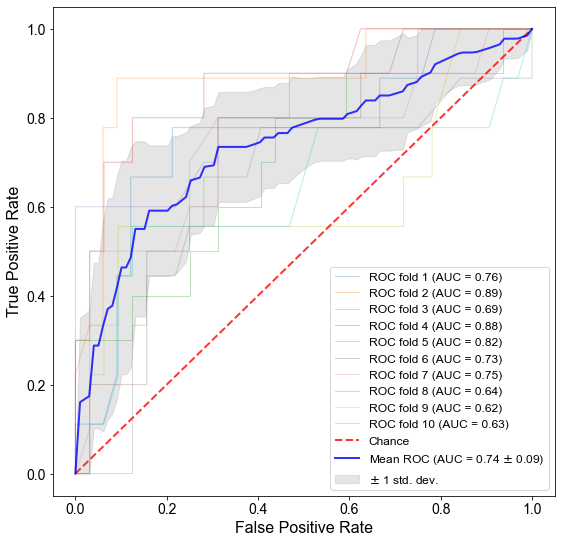

Max score: 0.8809523809523809
Min score: 0.7317073170731707
Avg score: 0.8006968641114982
Max F1-score: 0.865424430641822
Min F1-score: 0.7108846013833273
Avg F1-score: 0.7735768128032369
Max Precision-score: 0.8970398970398971
Min Precision-score: 0.6975609756097562
Avg Precision-score: 0.783713353797711
Max Recall-score: 0.8809523809523809
Min Recall-score: 0.7317073170731707
Avg Recall-score: 0.8006968641114982


In [79]:
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(10,10))

skf = StratifiedKFold(n_splits=10)
roberta = np.array(roberta)
labels = np.array(labels)
sum_score = []
f1 = []
precision = []
recall = []

i = 1
for train_index, test_index in skf.split(roberta, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = roberta[train_index], roberta[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    ros = RandomOverSampler(random_state=0)
    x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # random forest
    RF_clf = RandomForestClassifier(random_state=0, class_weight='balanced')
    RF_clf.fit(x_train_resampled, y_train_resampled)
    # RF_clf.fit(x_train, y_train)
    score_RF = RF_clf.score(x_test, y_test)
    y_predicted = RF_clf.predict(x_test)
    
    print(y_predicted)
    print("The score of random forest is : %f" % score_RF)
    print("The F1-score of random forest is : %f" % f1_score(y_test, y_predicted, average='weighted'))
    # print("The confusion matrix : \n", confusion_matrix(y_test, y_predicted))
    print("The precision-score of random forest is : %f" % precision_score(y_test, y_predicted, average='weighted'))
    print("The recall-score of random forest is : %f" % recall_score(y_test, y_predicted, average='weighted'))

    sum_score.append(score_RF)
    f1.append(f1_score(y_test, y_predicted, average='weighted'))
    precision.append(precision_score(y_test, y_predicted, average='weighted'))
    recall.append(recall_score(y_test, y_predicted, average='weighted'))

    viz = RocCurveDisplay.from_estimator(
        RF_clf,
        x_test,
        y_test,
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

    i += 1

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
    
)

# ax.legend(prop={'family': 'Times New Roman', 'size': 5})

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    # title=r"$\bf{ "Predicting adolescents psychological conditions with textual modality"}$",
)

font = FontProperties()
font.set_name('Arial')
font.set_size(16)
ax.set_ylabel('True Positive Rate',fontproperties=font)
ax.set_xlabel('False Positive Rate',fontproperties=font)

# plt.title("Predicting adolescents psychological conditions with textual modality", fontname="Arial", \
#     fontweight="bold", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

font.set_size(12)
ax.legend(loc="lower right", prop=font)

plt.savefig('ROC.pdf')
# plt.yticks(fontproperties = "Arial")
# plt.xticks(fontproperties = "Arial")
# ax.title.set_size(20)
# ax.xaxis.label.set_size(16)
# ax.xaxis.label.set_family('arial')
# ax.xaxis.label.set_size(16)
# ax.xaxis.label.set_family('arial')
# plt.legend(prop={'family': 'Arial'})
plt.show()

print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

print("Max F1-score:", np.max(f1))
print("Min F1-score:", np.min(f1))
print("Avg F1-score:", np.mean(f1))

print("Max Precision-score:", np.max(precision))
print("Min Precision-score:", np.min(precision))
print("Avg Precision-score:", np.mean(precision))

print("Max Recall-score:", np.max(recall))
print("Min Recall-score:", np.min(recall))
print("Avg Recall-score:", np.mean(recall))

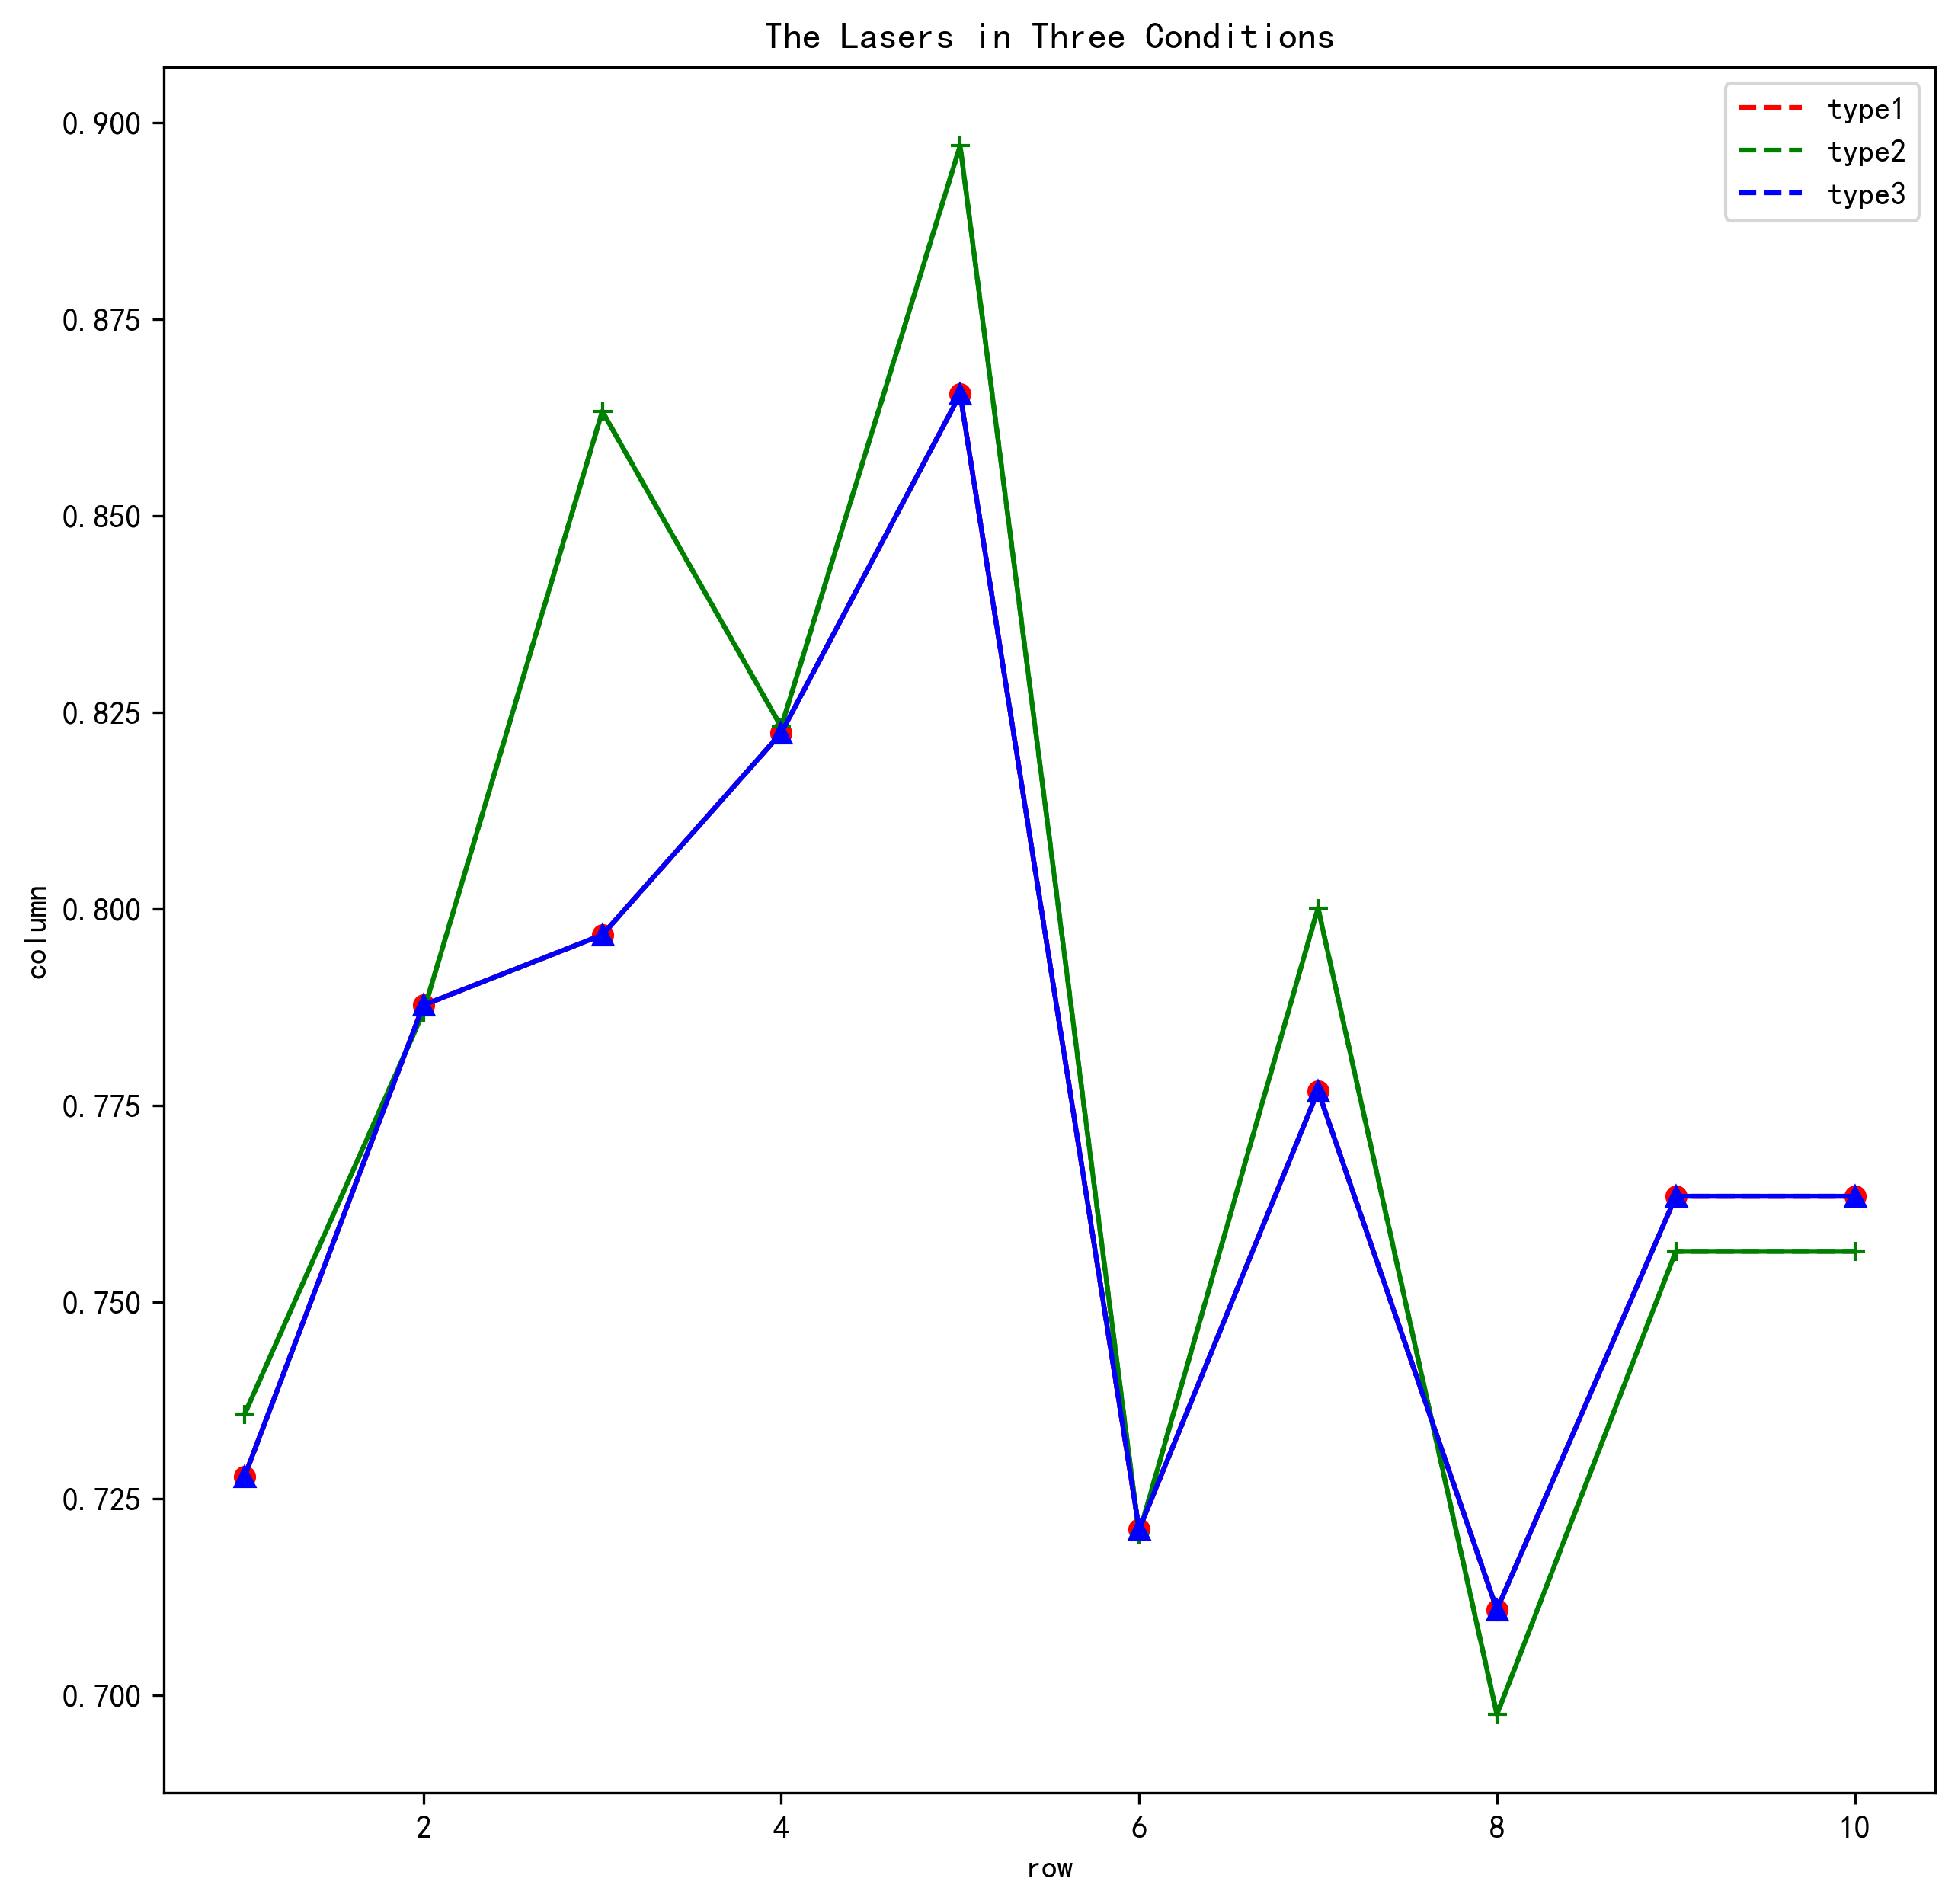

In [53]:

import numpy as np
import matplotlib.pyplot as plt  

plt.figure(figsize=(10,10))
x1=[1,2,3,4,5,6,7,8,9,10]
y1=[0.727806, 0.787755, 0.796678, 0.822359, 0.865424, 0.721088, 0.776871, 0.710885, 0.763451, 0.763451]

y2=[0.735714, 0.786873, 0.863248, 0.823129, 0.897040, 0.720551, 0.800125, 0.697561, 0.756446, 0.756446]


x=np.arange(-0.05, 10.05)
l1=plt.plot(x1,y1,'r--',label='type1')
l2=plt.plot(x1,y2,'g--',label='type2')
l3=plt.plot(x1,y1,'b--',label='type3')
plt.plot(x1,y1,'ro-',x1,y2,'g+-',x1,y1,'b^-')
plt.title('The Lasers in Three Conditions')
plt.xlabel('row')
plt.ylabel('column')
plt.legend()
plt.show()

In [9]:
skf = StratifiedKFold(n_splits=10)
macberta = np.array(macberta)
labels = np.array(labels)
sum_score = []
f1 = []
for train_index, test_index in skf.split(macberta, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = macberta[train_index], macberta[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    ros = RandomOverSampler(random_state=0)
    # x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # random forest
    RF_clf = RandomForestClassifier(random_state=0, class_weight='balanced')
    # RF_clf.fit(x_train_resampled, y_train_resampled)
    RF_clf.fit(x_train, y_train)
    score_RF = RF_clf.score(x_test, y_test)
    y_predicted = RF_clf.predict(x_test)
    print(y_predicted)
    test_f1 = f1_score(y_test, y_predicted, average='weighted')
    print("The score of random forest is : %f" % score_RF)
    
    sum_score.append(score_RF)
    f1.append(test_f1)
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))
print("Avg score:", np.mean(f1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0]
The score of random forest is : 0.809524
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0]
The score of random forest is : 0.785714
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0]
The score of random forest is : 0.785714
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0]
The score of random forest is : 0.809524
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0]
The score of random forest is : 0.761905
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 0]
The score of random forest is : 0.809524
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0]
The score of random forest is : 0.761905
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
The score of random

In [22]:
skf = StratifiedKFold(n_splits=10)
pert = np.array(pert)
labels = np.array(labels)
sum_score = []
for train_index, test_index in skf.split(pert, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = pert[train_index], pert[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    # smote_tomek = SMOTETomek(random_state=0)
    # x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # GBDT
    gbdt_clf = GradientBoostingClassifier(random_state=0)
    # gbdt_clf.fit(x_train_resampled, y_train_resampled)
    gbdt_clf.fit(x_train, y_train)
    score_gbdt = gbdt_clf.score(x_test, y_test)
    y_predicted = gbdt_clf.predict(x_test)
    print(y_predicted)
    print("The score of GBDT is : %f" % score_gbdt)
    
    sum_score.append(score_gbdt)
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 1 0]
The score of GBDT is : 0.761905
[0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0
 0 1 1 1 0]
The score of GBDT is : 0.761905
[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 0]
The score of GBDT is : 0.785714
[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0
 0 1 1 0 0]
The score of GBDT is : 0.738095
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 1 1 0 1]
The score of GBDT is : 0.738095
[0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 1]
The score of GBDT is : 0.714286
[0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 0 1 0]
The score of GBDT is : 0.809524
[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0]
The score of GBDT is : 0.731707
[1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1

In [552]:
kf = KFold(n_splits=10)
pert = np.array(pert)
labels = np.array(labels)
sum_score = []
for train_index, test_index in kf.split(pert, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = pert[train_index], pert[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    smote_tomek = SMOTETomek(random_state=0)
    x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # LR
    logreg = linear_model.LogisticRegression(max_iter=50000, random_state=0, solver='liblinear', class_weight='balanced' )
    logreg.fit(x_train_resampled, y_train_resampled)
#     logreg.fit(x_train, y_train)
    score_lr = logreg.score(x_test, y_test)
    y_predicted = logreg.predict(x_test)
    print(y_predicted)
    print("The score of LR is : %f" % score_lr)
    sum_score.append(score_lr)
    
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0
 0 1 0 1 1]
The score of LR is : 0.380952
[0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0
 1 1 0 0 0]
The score of LR is : 0.571429
[1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1
 0 0 0 0 0]
The score of LR is : 0.642857
[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0
 1 0 0 1 1]
The score of LR is : 0.690476
[1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0
 1 1 0 0 0]
The score of LR is : 0.690476
[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0]
The score of LR is : 0.785714
[1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 1]
The score of LR is : 0.571429
[1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0
 0 1 1 1]
The score of LR is : 0.756098
[1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1

In [553]:
kf = KFold(n_splits=10)
pert = np.array(pert)
labels = np.array(labels)
sum_score = []
for train_index, test_index in kf.split(pert, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = pert[train_index], pert[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    smote_tomek = SMOTETomek(random_state=0)
    x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # kernel = 'rbf'
    clf_rbf = svm.SVC(kernel='rbf', class_weight='balanced')
    clf_rbf.fit(x_train_resampled, y_train_resampled)
#     clf_rbf.fit(x_train, y_train)
    score_rbf = clf_rbf.score(x_test, y_test)
    y_predicted = clf_rbf.predict(x_test)
    print(y_predicted)
    print("The score of SVM RBF is : %f" % score_rbf)
    sum_score.append(score_rbf)
    
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 1]
The score of SVM RBF is : 0.595238
[0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0]
The score of SVM RBF is : 0.785714
[0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0]
The score of SVM RBF is : 0.809524
[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0]
The score of SVM RBF is : 0.833333
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 0]
The score of SVM RBF is : 0.833333
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0]
The score of SVM RBF is : 0.880952
[1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0]
The score of SVM RBF is : 0.761905
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1]
The score of SVM RBF is : 0.682927
[1 1 0 1 0 0 0 0 0 1 0 0 1

In [554]:
kf = KFold(n_splits=10)
pert = np.array(pert)
labels = np.array(labels)
sum_score = []
for train_index, test_index in kf.split(pert, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = pert[train_index], pert[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    smote_tomek = SMOTETomek(random_state=0)
    x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # kernel = 'linear'
    clf_linear = svm.SVC(kernel='linear', class_weight='balanced')
    clf_linear.fit(x_train_resampled, y_train_resampled)
#     clf_linear.fit(x_train, y_train)
    score_linear = clf_linear.score(x_test, y_test)
    y_predicted = clf_linear.predict(x_test)
    print(y_predicted)
    print("The score of SVM linear is : %f" % score_linear)
    sum_score.append(score_linear)
    
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 1]
The score of SVM linear is : 0.619048
[0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0]
The score of SVM linear is : 0.690476
[0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0]
The score of SVM linear is : 0.785714
[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0]
The score of SVM linear is : 0.833333
[1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 0]
The score of SVM linear is : 0.785714
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 1 0]
The score of SVM linear is : 0.833333
[1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0 0]
The score of SVM linear is : 0.714286
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1]
The score of SVM linear is : 0.707317
[1

In [555]:
kf = KFold(n_splits=10)
pert = np.array(pert)
labels = np.array(labels)
sum_score = []
for train_index, test_index in kf.split(pert, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = pert[train_index], pert[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    smote_tomek = SMOTETomek(random_state=0)
    x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # kernel = 'poly'
    clf_poly = svm.SVC(kernel='poly', class_weight='balanced')
    clf_poly.fit(x_train_resampled, y_train_resampled)
#     clf_poly.fit(x_train, y_train)
    score_poly = clf_poly.score(x_test, y_test)
    y_predicted = clf_poly.predict(x_test)
    print(y_predicted)
    print("The score of SVM poly is : %f" % score_poly)
    
    sum_score.append(score_poly)
    
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 1]
The score of SVM poly is : 0.595238
[0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 0]
The score of SVM poly is : 0.761905
[0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0]
The score of SVM poly is : 0.809524
[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0]
The score of SVM poly is : 0.833333
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 0]
The score of SVM poly is : 0.833333
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 1 0]
The score of SVM poly is : 0.857143
[1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0]
The score of SVM poly is : 0.761905
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1]
The score of SVM poly is : 0.682927
[1 1 0 1 0 0 0 0 0

In [556]:
kf = KFold(n_splits=10)
pert = np.array(pert)
labels = np.array(labels)
sum_score = []
for train_index, test_index in kf.split(pert, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = pert[train_index], pert[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    smote_tomek = SMOTETomek(random_state=0)
    x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # random forest
    RF_clf = RandomForestClassifier(random_state=0, class_weight='balanced')
    RF_clf.fit(x_train_resampled, y_train_resampled)
#     RF_clf.fit(x_train, y_train)
    score_RF = RF_clf.score(x_test, y_test)
    y_predicted = RF_clf.predict(x_test)
    print(y_predicted)
    print("The score of random forest is : %f" % score_RF)
    
    sum_score.append(score_RF)
    
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0]
The score of random forest is : 0.880952
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of random forest is : 0.952381
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of random forest is : 0.928571
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0]
The score of random forest is : 0.928571
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0]
The score of random forest is : 0.880952
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0]
The score of random forest is : 0.952381
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1]
The score of random forest is : 0.880952
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 0]
The score of random

In [557]:
kf = KFold(n_splits=10)
pert = np.array(pert)
labels = np.array(labels)
sum_score = []
for train_index, test_index in kf.split(pert, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = pert[train_index], pert[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
#     ros = RandomOverSampler(random_state=0)
#     x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#     sm = SMOTE(random_state=0)
#     x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
#     ada = ADASYN(random_state=0)
#     x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)
#     rus = RandomUnderSampler(random_state=0)
#     x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)
#     smote_enn = SMOTEENN(random_state=0)
#     x_train_resampled, y_train_resampled  = smote_enn.fit_resample(x_train, y_train)
    smote_tomek = SMOTETomek(random_state=0)
    x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)
    # GBDT
    gbdt_clf = GradientBoostingClassifier(random_state=0)
    gbdt_clf.fit(x_train_resampled, y_train_resampled)
#     gbdt_clf.fit(x_train, y_train)
    score_gbdt = gbdt_clf.score(x_test, y_test)
    y_predicted = gbdt_clf.predict(x_test)
    print(y_predicted)
    print("The score of GBDT is : %f" % score_gbdt)
    
    sum_score.append(score_gbdt)
    
print("Max score:", np.max(sum_score))
print("Min score:", np.min(sum_score))
print("Avg score:", np.mean(sum_score))

[0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of GBDT is : 0.833333
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0]
The score of GBDT is : 0.857143
[1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0]
The score of GBDT is : 0.857143
[1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0]
The score of GBDT is : 0.857143
[1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1]
The score of GBDT is : 0.833333
[0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1]
The score of GBDT is : 0.880952
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0]
The score of GBDT is : 0.761905
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 0]
The score of GBDT is : 0.707317
[0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0